<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/08_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>점진적 학습</h3>
기존 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 훈련한다.<br>
대표적인 점진적 학습 알고리즘은 '확률적 경사 하강법' 이다.
<br><br>
<h3>확률적 경사 하강법</h3>
랜덤으로 학습용데이터에서 하나 추출후 하강하면서 학습을 진행한다.
<br>여러개의 데이터를 추출후 하강하면서 학습을 진행하는 방법은 <br>
미니배치 경사 하강법 이다.


In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')      # 사전 데이터 준비

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)    # train_input 데이터 표준화
test_scaled = ss.transform(test_input)      # test_input 데이터 표준화

In [ ]:
# 확률적 경사 하강법
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)    # 객체 만들 때 2개의 매개변수 지정. loss = '손실 함수의 종류 지정', max_iter = '에포크 횟수(반복횟수)를 지정'
sc.fit(train_scaled, train_target)

print('trian score : ', sc.score(train_scaled, train_target))
print('test score : ', sc.score(test_scaled, test_target))

# 아래 경고문은 max_iter='' 값을 증가시키면된다

trian score :  0.773109243697479
test score :  0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 점진적 학습시켜보기
sc.partial_fit(train_scaled, train_target)
print('trian score : ', sc.score(train_scaled, train_target))
print('test score : ', sc.score(test_scaled, test_target))

trian score :  0.8151260504201681
test score :  0.85


In [ ]:
# 최적의 에포크 확인하는 방법
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)     # train_target에 있는 7개 생선의 목록을 만든다.

In [ ]:
# 에포크를 300번 훈련시켜서 해당 점수들을 위에 만든 리스트에 추가한다.
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


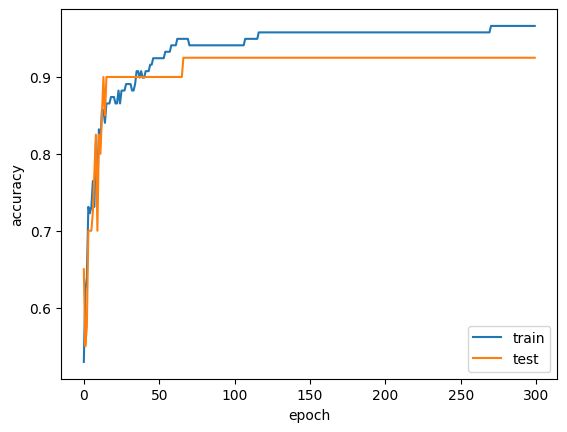

In [ ]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend(loc='lower right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 위 그래프 확인시 epoch = 100 일때 train, test 학습률이 점점 멀어지는 추세를 확인할수있다.
# max_iter=100으로 하고 학습시키기

sc = SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)     # tol=''  <- 의미는 loss 값이 가장 낮을때...?, ex) 에포크가 100인데 그전에 loss 값이 tol 값 보다 클때까지 반복함.
sc.fit(train_scaled, train_target)

print('trian score : ', sc.score(train_scaled, train_target))
print('test score : ', sc.score(test_scaled, test_target))

trian score :  0.957983193277311
test score :  0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
# loss매개변수 기본값 hinge => 서포트 벡터 머신
sc = SGDClassifier(loss='hinge', max_iter=100, random_state=42, tol=None)
sc.fit(train_scaled, train_target)

print('trian score : ', sc.score(train_scaled, train_target))
print('test score : ', sc.score(test_scaled, test_target))

trian score :  0.9495798319327731
test score :  0.925
